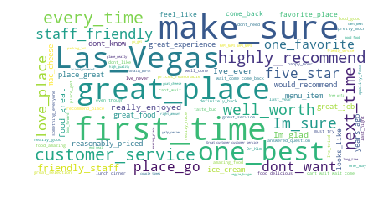

In [13]:
from pyspark import SparkConf, SparkContext
from wordcloud import WordCloud, STOPWORDS
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
import nltk
import json
import string
stopwordsNLTK = set(STOPWORDS)

def get_text(x):
    obj = json.loads(x)
    text_new = obj['text']
    return text_new.split()

input = sc.textFile("file:///Users/yashparikh/Project/five_star_reviews.json")
review_text_rdd = input.flatMap(lambda x: get_text(x))
tokenized_sentences_with_no_stopwords = review_text_rdd.collect() # sentences with no punctuation and stopwords

bigrams = ["%s_%s" % bi for bi in nltk.bigrams(tokenized_sentences_with_no_stopwords)]

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwordsNLTK,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(" ".join(bigrams)))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# # fig.savefig("word1.png", dpi=900)


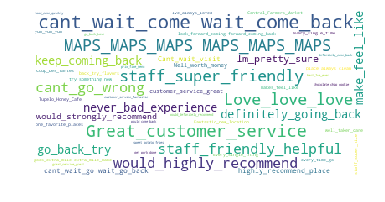

In [14]:
trigrams = ["%s_%s_%s" % tri for tri in nltk.trigrams(tokenized_sentences_with_no_stopwords)]
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwordsNLTK,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(" ".join(trigrams)))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()